In [11]:
import seaborn as sns
import numpy as np
%matplotlib inline 

We are going to use data offered from gov.uk regarding sales volume of properties in UK. The link is
http://publicdata.landregistry.gov.uk/market-trend-data/house-price-index-data/Sales-2017-12.csv?utm_medium=GOV.UK&utm_source=datadownload&utm_campaign=sales&utm_term=9.30_13_02_18

In [12]:
import pandas as pd

In [14]:
df = pd.read_csv('Sales-2017-12.csv')

In [15]:
df.head()

,Date,Region_Name,Area_Code,Sales_Volume
0,1995-01-01,England,E92000001,47639
1,1995-01-01,Wales,W92000004,1991
2,1995-01-01,Inner London,E13000001,2890
3,1995-01-01,Outer London,E13000002,4616
4,1995-01-01,London,E12000007,7506


Find the sales for Reading

In [19]:
df_R = df[df['Region_Name']=='Reading']

In [20]:
df_R.info()  #274 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 380 to 115556
Data columns (total 4 columns):
Date            274 non-null object
Region_Name     274 non-null object
Area_Code       274 non-null object
Sales_Volume    274 non-null int64
dtypes: int64(1), object(3)
memory usage: 10.7+ KB


In [21]:
df_R.head()

,Date,Region_Name,Area_Code,Sales_Volume
380,1995-01-01,Reading,E06000038,137
719,1995-02-01,Reading,E06000038,161
1169,1995-03-01,Reading,E06000038,217
1538,1995-04-01,Reading,E06000038,153
1967,1995-05-01,Reading,E06000038,232


Create two more columns for Year and Month

In [30]:
df_R['Year']=df_R['Date'].str.slice(0,4)

#ignore any warnings

C:\Users\koustoud\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
#A different approach using apply() method and a lambda function:
df_R['Month'] = df_R['Date'].apply(lambda s:s.split('-')[1])

C:\Users\koustoud\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
df_R.tail()

,Date,Region_Name,Area_Code,Sales_Volume,Year,Month
113786,2017-06-01,Reading,E06000038,231,2017,06
114237,2017-07-01,Reading,E06000038,204,2017,07
114675,2017-08-01,Reading,E06000038,215,2017,08
115136,2017-09-01,Reading,E06000038,173,2017,09
115556,2017-10-01,Reading,E06000038,173,2017,10


Create a Pivot Table with 'Month' as rows, 'Year' as columns and 'Sales_Volume' as data

In [36]:
pivot = df_R.pivot_table(values='Sales_Volume' , index='Month', columns='Year')

In [37]:
pivot

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Month,,,,,,,,,,,,,,,,,,,,,
01,137.0,151.0,210.0,222.0,234.0,226.0,261.0,250.0,250.0,301.0,...,228.0,86.0,109.0,132.0,157.0,167.0,252.0,195.0,188.0,194.0
02,161.0,164.0,248.0,217.0,220.0,294.0,259.0,242.0,255.0,272.0,...,217.0,93.0,140.0,119.0,141.0,164.0,183.0,228.0,225.0,188.0
03,217.0,244.0,279.0,280.0,343.0,316.0,299.0,329.0,240.0,301.0,...,191.0,138.0,152.0,146.0,244.0,182.0,196.0,239.0,461.0,204.0
04,153.0,203.0,269.0,268.0,310.0,318.0,321.0,306.0,246.0,366.0,...,238.0,143.0,187.0,152.0,102.0,185.0,221.0,250.0,194.0,154.0
05,232.0,251.0,290.0,298.0,303.0,326.0,362.0,412.0,287.0,358.0,...,205.0,147.0,140.0,137.0,149.0,220.0,240.0,305.0,155.0,161.0
06,209.0,281.0,324.0,306.0,356.0,396.0,361.0,347.0,296.0,394.0,...,203.0,217.0,200.0,164.0,146.0,240.0,251.0,254.0,261.0,231.0
07,241.0,290.0,312.0,374.0,463.0,329.0,401.0,428.0,358.0,455.0,...,136.0,217.0,206.0,259.0,186.0,239.0,262.0,285.0,291.0,204.0
08,244.0,345.0,343.0,366.0,303.0,297.0,393.0,398.0,357.0,359.0,...,160.0,199.0,204.0,200.0,222.0,297.0,313.0,288.0,255.0,215.0
09,223.0,311.0,359.0,334.0,360.0,279.0,279.0,304.0,331.0,364.0,...,136.0,237.0,200.0,185.0,168.0,267.0,257.0,259.0,213.0,173.0


Create a Heatmap for the Sales_Volume of Reading during the months of years 1995-2017 (the previous pivot table).
For heatmaps the data needs to be in a "matrix" form and by this I mean there must be variables not only in columns but in rows as well. That is why we created the pivot table.

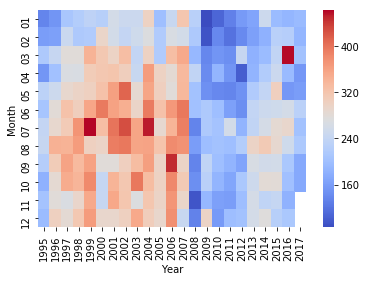

In [40]:
sns.heatmap(data=pivot, cmap='coolwarm')

Let's make the graph bigger

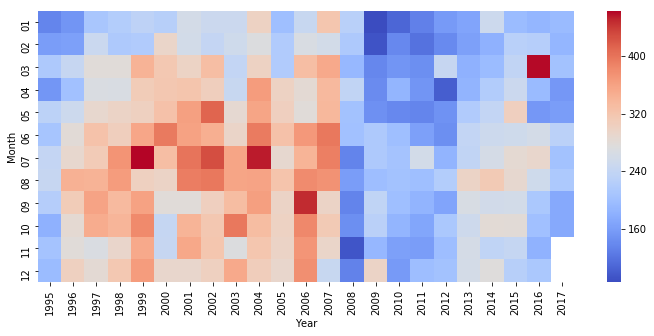

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(12,5)
ax.set_title ='Properties Sales Volume in Reading, UK'

sns.heatmap(data=pivot, cmap='coolwarm')

Properties Sales Volume in Reading, UK

In [52]:
fig.savefig('Reading_Sales_Volume2.png', dpi=600)